254     145000.0
1066    178000.0
638      85000.0
799     175000.0
380     127000.0
Name: SalePrice, dtype: float64


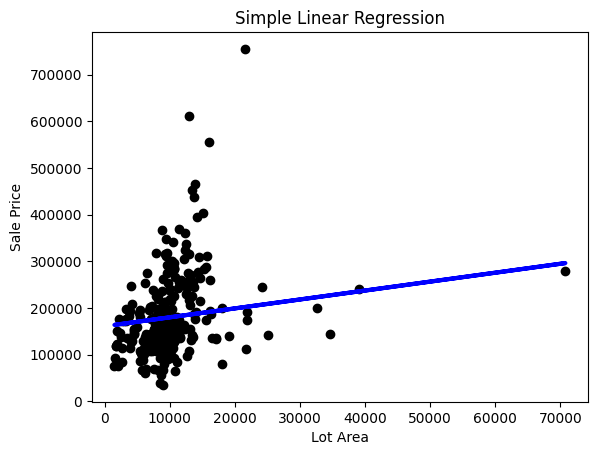

Mean Absolute Error (MAE): 59875.11532430813
Mean Squared Error (MSE): 7189094014.825961
R-squared (R²): 0.06273946887816162
Root Mean Squared Error (RMSE): 84788.52525445858


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
house_price_prediction = pd.read_csv("/users/amulya/Downloads/HousePricePrediction.csv")
# print(house_price_prediction.head())
#simple linear regresssion
unwanted_columns = ['Id','MSZoning','MSSubClass','LotConfig','BldgType','OverallCond','YearBuilt','YearRemodAdd','Exterior1st','BsmtFinSF2','TotalBsmtSF']
house_price_prediction = house_price_prediction.drop(unwanted_columns,axis=1)
# print(house_price_prediction)
house_price_prediction.dropna(subset=['SalePrice'], inplace=True)
x = house_price_prediction[['LotArea']]  
y = house_price_prediction['SalePrice'] 
# print(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(y_train.head())
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Simple Linear Regression')
plt.show()
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
# print('mean_absolute_error:', mae)
# print('mean_squared_error:' mse)
# print('r_squared:'r_squared)
# print('rmse:'rmse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)  
print("Root Mean Squared Error (RMSE):", rmse)

In [65]:
# r square value calculation
mean_y_train = sum(y_train) / len(y_train)
SST = sum((y - mean_y_train) ** 2 for y in y_train)
SSR = sum((y_test.values[i] - y_pred[i]) ** 2 for i in range(len(y_test)))
r_squared = 1 - (SSR / SST)
# r_squared = SSR/SST
print("R-squared:", r_squared)

R-squared: 0.6986741012697013


In [66]:
# rmse calculation
# residuals = [y_train.values[i] - y_pred[i] for i in range(len(y_train))]
house_price_prediction.dropna(subset=['SalePrice'], inplace=True)
x = house_price_prediction[['LotArea']]  
y = house_price_prediction['SalePrice'] 
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
print(y_train,y_test)
residuals = y_train.reset_index(drop=True) - pd.Series(y_pred)
print(residuals)
# squared_residuals = [residual**2 for residual in residuals]
squared_residuals = residuals**2
# # Calculate mean of squared residuals
mse = sum(squared_residuals) / len(squared_residuals)
# mse = np.square(np.subtract(y_train,y_pred)).mean()
# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64
254     145000.0
1066    178000.0
638      85000.0
799     175000.0
380     127000.0
          ...   
1095    176432.0
1130    135000.0
1294    115000.0
860     189950.0
1126    174000.0
Name: SalePrice, Length: 1168, dtype: float64 892     154500.0
1105    325000.0
413     115000.0
522     159000.0
1036    315500.0
          ...   
479      89471.0
1361    260000.0
802     189000.0
651     108000.0
722     124500.0
Name: SalePrice, Length: 292, dtype: float64
0      -32091.375138
1       -6435.825624
2      -93135.120574
3        4434.901270
4      -58663.086742
            ...     
1163             NaN
1164             NaN
1165             NaN
1166             NaN
1167             NaN
Length: 1168, dtype: float64
Root Mean Squared Error (RMSE): nan


In [67]:
# calculating adjusted r square
n = len(y_train)
k = 1
r_squared = r2_score(y_test, y_pred)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.06193564337977231
